# Dataset

In [ ]:
import os
import numpy as np
from PIL import Image
from scipy.signal import convolve
from skimage import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

# Directories
input_folder = "training_set"
output_folder = "testing_set"
os.makedirs(output_folder, exist_ok=True)

# 2D Gaussian Kernel
i

H = gauss2D()

# Process each image
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        filepath = os.path.join(input_folder, filename)
        try:
            # Load and convert image to grayscale float
            image = Image.open(filepath).convert('L')
            image_np = img_as_float(np.array(image))

            # Blur with convolution
            blurred = convolve(image_np, H, mode='same')

            # Normalize and rescale to 0–255
            blurred = np.clip(blurred, 0, 1)
            blurred_uint8 = (blurred * 255).astype(np.uint8)

            # Apply Poisson noise
            noisy = np.random.poisson(blurred_uint8).astype(np.float32) / 255.0
            noisy = np.clip(noisy, 0, 1)

            # Save to output folder
            noisy_image = Image.fromarray(img_as_ubyte(noisy))
            noisy_image.save(os.path.join(output_folder, filename))

            print(f"Processed and saved: {filename}")

        except Exception as e:
            print(f"Failed to process {filename}: {e}")


Processed and saved: web_patch_108.png
Processed and saved: web_patch_109.png
Processed and saved: web_patch_110.png
Processed and saved: web_patch_104.png
Processed and saved: web_patch_105.png
Processed and saved: web_patch_111.png
Processed and saved: web_patch_107.png
Processed and saved: web_patch_106.png
Processed and saved: web_patch_102.png
Processed and saved: web_patch_103.png
Processed and saved: web_patch_101.png
Processed and saved: web_patch_100.png


In [15]:
import os
import numpy as np
from PIL import Image
from scipy.signal import convolve
from skimage import img_as_float, img_as_ubyte

# Define Gaussian kernel
def gauss2D(shape=(15, 15), sigma=2):
    m, n = [(ss - 1) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x*x + y*y) / (2. * sigma * sigma))
    h /= h.sum()
    return h

# Paths
input_dir = 'training_set/target'
output_dir = 'training_set/blurred'
os.makedirs(output_dir, exist_ok=True)

# Create kernel
kernel = gauss2D()

# Process and save
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        try:
            path = os.path.join(input_dir, filename)
            image = Image.open(path).convert('L')
            image_np = img_as_float(np.array(image))

            # Apply Gaussian blur
            blurred = convolve(image_np, kernel, mode='same')
            blurred = np.clip(blurred, 0, 1)

            # Convert and save
            blurred_img = Image.fromarray(img_as_ubyte(blurred))
            blurred_img.save(os.path.join(output_dir, filename))

            print(f"Blurred and saved: {filename}")

        except Exception as e:
            print(f"Failed to process {filename}: {e}")


Blurred and saved: web_patch_108.png
Blurred and saved: web_patch_109.png
Blurred and saved: web_patch_110.png
Blurred and saved: web_patch_104.png
Blurred and saved: web_patch_105.png
Blurred and saved: web_patch_111.png
Blurred and saved: web_patch_107.png
Blurred and saved: web_patch_106.png
Blurred and saved: web_patch_102.png
Blurred and saved: web_patch_103.png
Blurred and saved: web_patch_101.png
Blurred and saved: web_patch_100.png


## Create dataset

In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class BlurredDataset(Dataset):
    def __init__(self, input_dir, target_dir, transform=None):
        self.input_dir = input_dir
        self.target_dir = target_dir
        self.transform = transform
        self.filenames = sorted([
            fname for fname in os.listdir(input_dir)
            if fname.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        input_path = os.path.join(self.input_dir, self.filenames[idx])
        target_path = os.path.join(self.target_dir, self.filenames[idx])

        input_image = Image.open(input_path).convert('L')
        target_image = Image.open(target_path).convert('L')

        if self.transform:
            input_image = self.transform(input_image)
            target_image = self.transform(target_image)

        return input_image, target_image


ImportError: cannot import name 'S' from 'sympy' (unknown location)

## Data loader

Batch 1: input shape torch.Size([4, 1, 64, 64]), target shape torch.Size([4, 1, 64, 64])


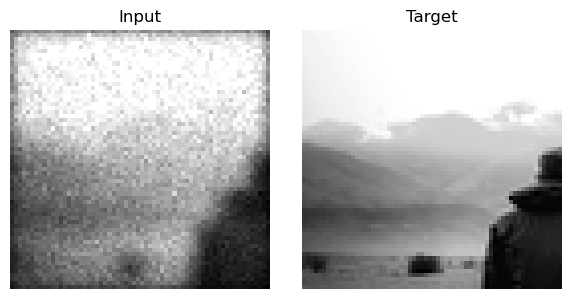

In [13]:
import torch

# Define transform: convert to tensor and normalize to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor()  # PIL grayscale -> (1, H, W) float tensor in [0, 1]
])

# Create dataset
dataset = BlurredDataset('training_set/blurred', 'training_set/target', transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Test it
for i, (inputs, targets) in enumerate(dataloader):
    print(f"Batch {i+1}: input shape {inputs.shape}, target shape {targets.shape}")
    # Plot side-by-side
    plt.figure(figsize=(6, 3))

    # Input (blurred + noisy)
    plt.subplot(1, 2, 1)
    plt.imshow(inputs[2, 0].numpy(), cmap='gray')
    plt.title('Input')
    plt.axis('off')

    # Target (clean)
    plt.subplot(1, 2, 2)
    plt.imshow(targets[2, 0].numpy(), cmap='gray')
    plt.title('Target')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    break


# Model

In [ ]:
# model = model from train
# 

# model definition
import torch
import numpy as np
from scipy.signal import convolve
print(torch.__version__)
class DEgrad():
    # define model elements
    def __init__(self, n_inputs, H, y, eta):
        super(DEgrad, self).__init__()
        self.layer1 = torch.nn.Linear(n_inputs, n_inputs)
        self.activation = torch.nn.Sigmoid()
        self.H = H
        self.y = y
        self.eta = eta
 
    # forward propagate input
    def forward(self, x):
        while loss > 0.001:
            ATy = convolve(self.y, np.flip(self.H), mode='same')
            Ax = convolve(x, self.H, mode='same')
            ATAx = convolve(Ax, np.flip(self.H), mode='same')
            # x1 = x + self.eta * self.A.T @ (self.y - self.A @ x)
            loss = np.linalg.norm(self.y - Ax, ord=2)
            x1 = x + self.eta * (ATy - ATAx)
            x2 = self.layer1(x)
            x2 = self.eta * self.activation(x2)
            x = x1 + x2
            
        x_inf = x
        return x_inf

1.13.1


NameError: name 'Module' is not defined

In [ ]:
batch = dataloader[2, 0]
y = batch[0]
x = batch[1]
# Function to create a 2D Gaussian kernel
def gauss2D(shape=(15, 15), sigma=2):
    """ Generate a 2D Gaussian kernel """
    m, n = [(ss - 1) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x*x + y*y) / (2. * sigma * sigma))
    h /= h.sum()  # Normalize
    return h

H = gauss2D()
eta = 0.001
model = DEgrad(x.shape, H, y, eta)
output = model.forward(np.zeros(x.shape))
plt.figure(figsize=(6, 3))

# Input (blurred + noisy)
plt.subplot(1, 2, 1)
plt.imshow(inputs[2, 0].numpy(), cmap='gray')
plt.title('Input')
plt.axis('off')

# Target (clean)
plt.subplot(1, 2, 2)
plt.imshow(targets[2, 0].numpy(), cmap='gray')
plt.title('Target')
plt.axis('off')


# Training

In [ ]:
# define the optimization
criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)


...
for i, (inputs, targets) in enumerate(test_dl):
    # evaluate the model on the test set
    yhat = model(inputs)
    # clear the gradients
    optimizer.zero_grad()
    # compute the model output
    yhat = model(inputs)
    # calculate loss
    loss = criterion(yhat, targets)
    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()

In [2]:
from scipy.signal import convolve
import numpy as np
def cgconvtik(H, D1, D2, Y, X0, convergence=0.001, lambda_const = 0.001):
    z_Cx = convolve(X0, H, mode='same')
    R1x = convolve(X0, D1, mode='same')
    z_Dx = convolve(R1x, D2, mode='same')

    CTy = convolve(Y, np.flip(H), mode='same')
    CTz_Cx = convolve(z_Cx, np.flip(H), mode='same')
    R1Tz_Dx = convolve(z_Dx, np.flip(D1), mode='same')
    DTz_Dx = convolve(R1Tz_Dx, np.flip(D2), mode='same')
    
    r = CTy - (CTz_Cx + lambda_const * DTz_Dx)
    p = r
    x = X0

    while True:
        z_Cp = convolve(p, H, mode='same')
        R1p = convolve(p, D1, mode='same')
        z_Dp = convolve(R1p, D2, mode='same')
        # z_Dp = np.concatenate((R1Tz_Dx, R2Tz_Dx))
        CTz_Cp = convolve(z_Cp, np.flip(H), mode='same')
        R1Tz_Dp = convolve(z_Dp, np.flip(D1), mode='same')
        DTz_Dp = convolve(R1Tz_Dp, np.flip(D2), mode='same')
        # DTz_Dp = R1Tz_Dp + R2Tz_Dp
        z_Ap = CTz_Cp + lambda_const * DTz_Dp
        
        z_Ap_flat = z_Ap.flatten(order="F")
        r_flat = r.flatten(order="F")
        p_flat = p.flatten(order="F")

        alpha = r_flat.dot(r_flat) / p_flat.dot(z_Ap_flat)
        x = x + alpha * p
        r_new = r - alpha * z_Ap
        r_new_flat = r_new.flatten(order="F")
        beta = r_new_flat.dot(r_new_flat) / r_flat.dot(r_flat)
        p = r_new + beta * p
        l2_norm = np.linalg.norm(r_new - r, ord=2)
        r = r_new
        if l2_norm < convergence:
            break
    return x


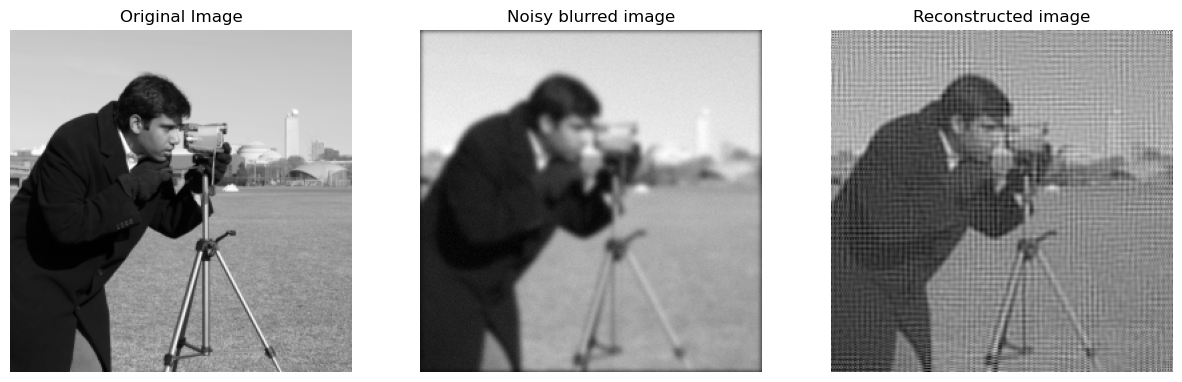

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import data

# Load and resize Cameraman image
X = resize(data.camera(), (256, 256), anti_aliasing=True)

# Function to create a 2D Gaussian kernel
def gauss2D(shape=(15, 15), sigma=2):
    """ Generate a 2D Gaussian kernel """
    m, n = [(ss - 1) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x*x + y*y) / (2. * sigma * sigma))
    h /= h.sum()  # Normalize
    return h

D2 = np.array([[-1, 0, 1]])
D1 = D2.T

H = gauss2D()
Y = convolve(X, H, mode='same')

# Add noise
SNR_dB = 30  # Signal-to-noise ratio in dB
var_Cx = np.var(Y)  # Variance of the clean image C.x (replace Cx with the actual image data)

# Calculate sigma_w^2 (variance of the noise)
sigma_w_squared = var_Cx / (10 ** (SNR_dB / 10))
sigma_w = np.sqrt(sigma_w_squared)
noise = np.random.normal(0, sigma_w, Y.shape)
noisy_Y = Y + noise



img = cgconvtik(H, D1, D2, noisy_Y, np.zeros(X.shape))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(X, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_Y, cmap='gray')
ax[1].set_title("Noisy blurred image")
ax[1].axis("off")

ax[2].imshow(img, cmap='gray')
ax[2].set_title("Reconstructed image")
ax[2].axis("off")

plt.show()

In [ ]:
import os
from PIL import Image

input_dir = "./data/fluorescence_img/"
output_format = "png"  # "png", "jpg", or "jpeg"
output_dir = os.path.join(input_dir, f"converted_{output_format}")
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    if filename.lower().endswith((".tif", ".tiff")):
        file_path = os.path.join(input_dir, filename)
        with Image.open(file_path) as img:
            print(f"{filename}: mode = {img.mode}")

            # Decide how to convert based on mode
            if img.mode == "1":
                print(f"{filename} is bilevel (black & white)")
                img_converted = img.convert("L")  # Convert to 8-bit grayscale
            elif img.mode in ("L", "P"):
                print(f"{filename} is grayscale or palette-based")
                img_converted = img.convert("RGB")
            elif img.mode in ("RGB", "RGBA", "CMYK"):
                print(f"{filename} is color (mode: {img.mode})")
                img_converted = img.convert("RGB")
            else:
                print(f"{filename}: unrecognized mode {img.mode}, skipping.")
                continue

            output_filename = os.path.splitext(filename)[0] + f".{output_format}"
            output_path = os.path.join(output_dir, output_filename)
            img_converted.save(output_path, output_format.upper())

print(f"Conversion to {output_format.upper()} complete.")



UnidentifiedImageError: cannot identify image file 'data/fluorescence_img/P0_S7_R3_3_2PF.tif'

In [3]:
from PIL import Image
import numpy as np

# Load image and convert to NumPy array
image = Image.open("/Users/tienld/Desktop/Digital Project/code/deep_equilibrium/data/fluorescence_img/P3_S2_R1_6_2PF.png").convert("RGB")
image_array = np.array(image)
print("Shape of PNG image:", image_array.shape)



Shape of PNG image: (512, 512, 3)


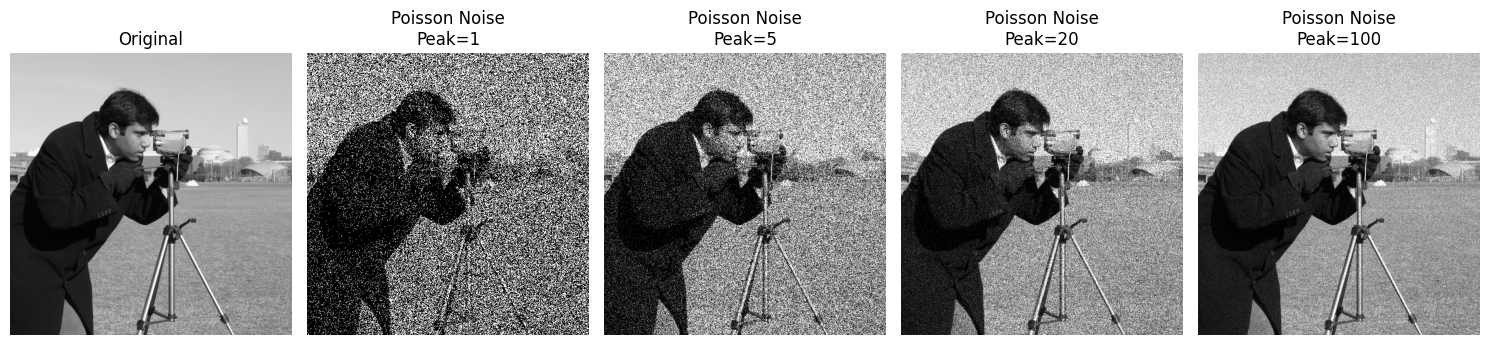

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

def add_poisson_noise(image, peak):
    """
    Simulate Poisson noise by scaling image to a peak value before applying noise.
    Lower peak -> more noise.
    """
    image_scaled = image * peak
    noisy = np.random.poisson(image_scaled).astype(np.float32) / peak
    return np.clip(noisy, 0, 1)

# Load a grayscale image
image = img_as_float(data.camera())

# Define different noise levels by controlling the peak value
peak_values = [1, 5, 20, 100]  # Lower = more noise
noisy_images = [add_poisson_noise(image, peak) for peak in peak_values]

# Plot original and noisy images
plt.figure(figsize=(15, 8))
plt.subplot(1, len(peak_values)+1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (noisy, peak) in enumerate(zip(noisy_images, peak_values), start=2):
    plt.subplot(1, len(peak_values)+1, i)
    plt.imshow(noisy, cmap='gray')
    plt.title(f"Poisson Noise\nPeak={peak}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import imageio.v3 as iio
from skimage import img_as_float

# Load and normalize image
image_path = '/Users/tienld/Desktop/Digital Project/code/deep_equilibrium/data/fluorescence_img/P0_S1_R1_1_3PF.png'
image = img_as_float(iio.imread(image_path))

# Automatically determine peak (e.g., use 99th percentile for robustness)
peak = np.percentile(image, 99)  # more robust than max
print(f"Estimated peak intensity (99th percentile): {peak:.4f}")

# Scale to simulate photon counts (normalized to 1.0 peak, rescale to [0, N])
scaled_image = image / peak  # normalize to [0, 1]
photon_image = scaled_image * 255  # assume 255 as photon count ceiling

# Estimate mean and sigma of Poisson noise
print(peak)
mean_photon_count = np.mean(photon_image)
sigma_poisson = np.sqrt(mean_photon_count)

print(f"Estimated mean photon count per pixel: {mean_photon_count:.2f}")
print(f"Estimated Poisson noise sigma: {sigma_poisson:.2f}")


Estimated peak intensity (99th percentile): 0.9176
0.9176470588235294
Estimated mean photon count per pixel: 44.84
Estimated Poisson noise sigma: 6.70


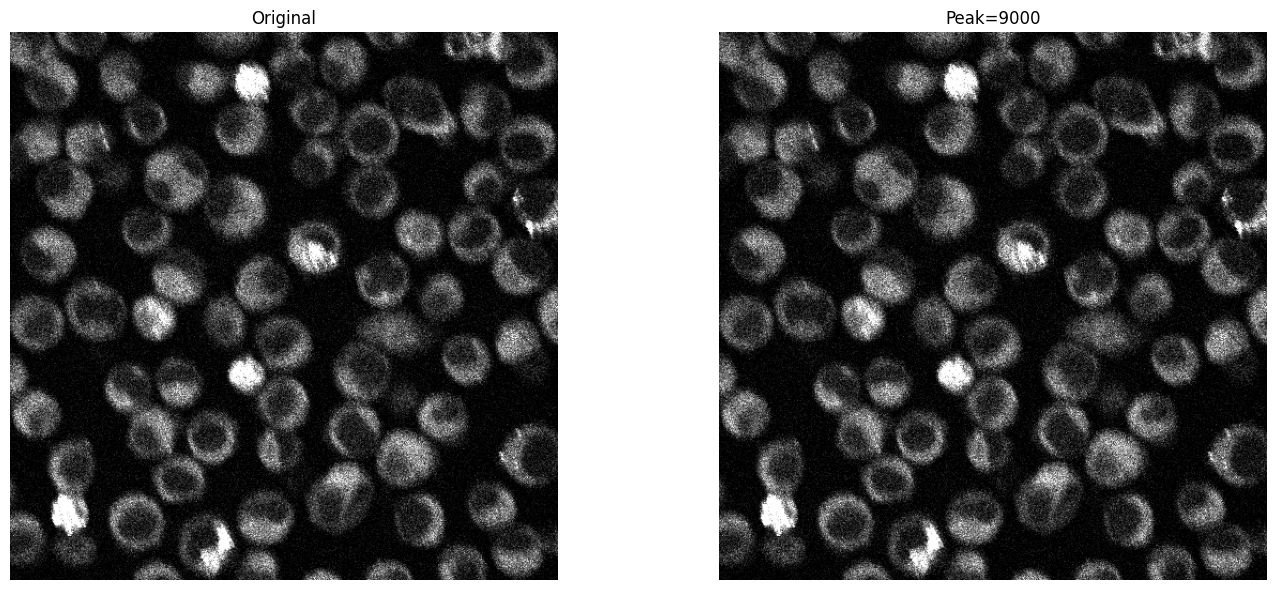

In [7]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage import img_as_float

def add_poisson_noise(image, peak):
    """
    Apply Poisson noise by scaling image to the peak, adding noise, and scaling back.
    """
    scaled = image * peak
    noisy = np.random.poisson(scaled) / peak
    return np.clip(noisy, 0, 1)

# Load and normalize the image
image_path = '/Users/tienld/Desktop/Digital Project/code/deep_equilibrium/data/fluorescence_img/P0_S1_R1_1_3PF.png'  # Update this to your file path
image = img_as_float(iio.imread(image_path))

# Define peak values to test
peak_values = [9000]
noisy_images = [add_poisson_noise(image, peak) for peak in peak_values]

# Plot original + noisy images
plt.figure(figsize=(15, 6))
plt.subplot(1, len(peak_values)+1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (noisy, peak) in enumerate(zip(noisy_images, peak_values), start=2):
    plt.subplot(1, len(peak_values)+1, i)
    plt.imshow(noisy, cmap='gray')
    plt.title(f"Peak={peak}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Gaussian noise std: 0.00864
Poisson noise std:  0.00929


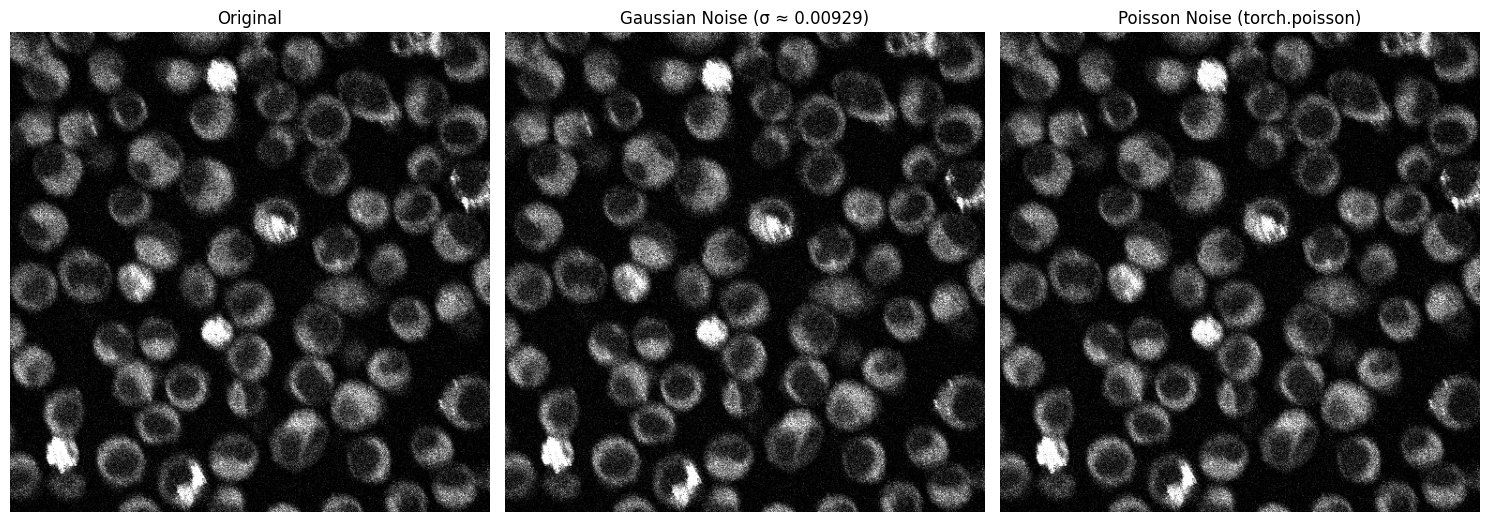

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
import imageio.v3 as iio
import torch

# Load and normalize image
image_path = '/Users/tienld/Desktop/Digital Project/code/deep_equilibrium/data/fluorescence_img/P0_S1_R1_1_3PF.png'  # Update this

image_np = img_as_float(iio.imread(image_path))  # shape: (H, W)
image = torch.tensor(image_np, dtype=torch.float32)

# Add Gaussian noise (reference)
sigma_gauss = 0.00929
gaussian_noise = torch.randn_like(image) * sigma_gauss
noisy_gaussian = torch.clamp(image + gaussian_noise, 0, 1)

# Poisson noise: scale to photons, apply torch.poisson, then scale back
# Use previously computed adjusted scale
scale_poisson = 1824.25
scaled_image = image * scale_poisson
poisson_counts = torch.poisson(scaled_image)
noisy_poisson = torch.clamp(poisson_counts / scale_poisson, 0, 1)

# Noise difference maps
noise_pois = noisy_poisson - image
noise_gauss = noisy_gaussian - image

# Show noise stats
print(f"Gaussian noise std: {noise_gauss.std().item():.5f}")
print(f"Poisson noise std:  {noise_pois.std().item():.5f}")

# Convert to NumPy for plotting
image_np = image.numpy()
noisy_gaussian_np = noisy_gaussian.numpy()
noisy_poisson_np = noisy_poisson.numpy()

# Plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_gaussian_np, cmap='gray')
plt.title("Gaussian Noise (σ ≈ 0.00929)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(noisy_poisson_np, cmap='gray')
plt.title("Poisson Noise (torch.poisson)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [16]:
from PIL import Image
from torchvision import transforms
transform = transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
    ]
)
with open(image_path, 'rb') as f:
    data = Image.open(f).convert("L")  # Grayscale PIL image
if transform is not None:
    data = transform(data)

print(f"Image shape: {data.shape}")  # This works if it's a tensor



Image shape: torch.Size([1, 64, 64])


In [ ]:
import torch
from torch.nn.functional import conv2d
weight = torch.rand(64, 1, 40, 40)
u = torch.rand(1, 64, 40, 40)
weight_mat = weight
# out, In, kernel0, kernel1 = weight_mat.shape
'''
if self.dim != 0:
    # permute dim to front
    weight_mat = weight_mat.permute(self.dim,
                                    *[d for d in range(weight_mat.dim()) if d != self.dim])
height = weight_mat.size(0)
weight_mat = weight_mat.reshape(height, -1)
'''
with torch.no_grad():
    for _ in range(3):

        print(_)
        print("U:", u.shape)
        print("U flip:", u.flip(2,3).shape)
        # print("V:", v.shape)
        
        v = normalize(conv2d(u.flip(2,3), weight_mat.permute(1, 0, 2, 3), padding=2),
                        eps=self.eps).flip(2,3)[:,:,1:-1,1:-1]
        u = normalize(conv2d(v, weight_mat, padding=1), eps=self.eps)
        print("U after:", u.shape)
        print("V after:", v.shape)
        if self.n_power_iterations > 0:
            # See above on why we need to clone
            u = u.clone()
            v = v.clone()

In [5]:
# set up loss and train
import torch
lossfunction = torch.nn.MSELoss(reduction='sum')
reconstruction = torch.rand([16, 3, 128, 128])
sample_batch = torch.rand([16, 3, 128, 128])
loss = lossfunction(reconstruction, sample_batch)
print(loss.item())

130862.1640625


In [11]:

import sys
sys.path.append('./deep_equilibrium_inverse')
from deep_equilibrium_inverse.networks.normalized_equilibrium_u_net import UnetModel, DnCNN
n_channels = 3
dl_model = DnCNN(channels=n_channels)

sample_batch = torch.rand([16, 3, 128, 128])
nonlinear = dl_model(sample_batch)
print("nonlinear", torch.isnan(nonlinear).sum(), torch.isinf(nonlinear).sum())


nonlinear tensor(0) tensor(0)


In [12]:
print(torch.tensor(0.2))

tensor(0.2000)


From 0.020208895206451416 to 1.0
From 0.027450978755950928 to 1.0


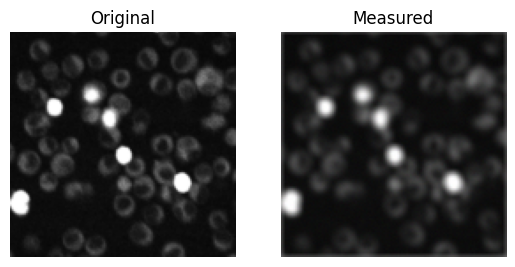

In [28]:
import torch

import sys
sys.path.append('./deep_equilibrium_inverse')
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import operators.blurs as blurs
from operators.operator import OperatorPlusPoissonNoise, OperatorPlusNoise
# Example placeholders
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
image_path = "data/fluorescence_img/P0_S1_R1_4_2PF.png"

# --- Parameters ---
kernel_size = 5
kernel_sigma = 5.0
scale_factor = 1825
noise_sigma=1e-2

# --- Load and preprocess image ---
img = Image.open(image_path).convert('RGB')  # grayscale; use 'RGB' for color
transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)
img_tensor = transform(img).to(device)  # shape: [1, H, W]
img_tensor = img_tensor.unsqueeze(0)    # shape: [B, C, H, W]

# --- Define forward operator and measurement process ---
forward_operator = blurs.GaussianBlur(sigma=kernel_sigma, kernel_size=kernel_size,
                                      n_channels=n_channels, n_spatial_dimensions=2).to(device=device)

measurement_process = OperatorPlusNoise(forward_operator, noise_sigma).to(device)

def norm(x):
    image_normalized = (x + 1) / 2
    return image_normalized
# --- Apply measurement process ---
with torch.no_grad():
    measured = measurement_process(img_tensor)
    measured = norm(measured)
    measured = torch.clamp(measured, 0, 1)
    img_tensor = norm(img_tensor)
    img_tensor = torch.clamp(img_tensor, 0, 1)

measured = measured.squeeze().permute(1, 2, 0).cpu().numpy()
img_tensor = img_tensor.squeeze().permute(1, 2, 0).cpu().numpy()

# --- Compute MSE loss ---
# loss_fn = torch.nn.MSELoss(reduction='mean')
# loss = loss_fn(measured, img_tensor)
# print("MSE Loss:", loss.item() * 50)
print(f"From {measured.min()} to {measured.max()}")
print(f"From {img_tensor.min()} to {img_tensor.max()}")
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img_tensor)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Measured")
plt.imshow(measured)
plt.axis('off')
plt.show()


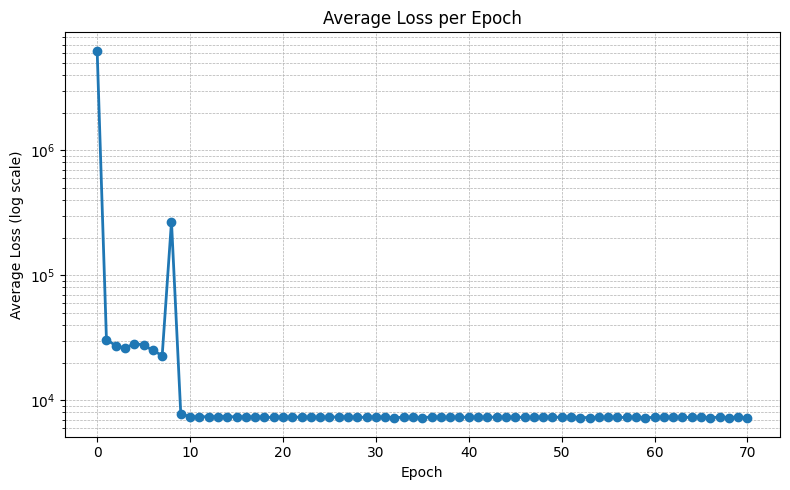

In [33]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

# Load JSON file
with open('deep_equilibrium_inverse/loss_log.json', 'r') as f:
    data = json.load(f)



epoch_losses = defaultdict(list)
for entry in data:
    epoch = entry['epoch']
    loss = entry['loss']
    epoch_losses[epoch].append(loss)

# --- Compute average loss ---
avg_losses = {
    epoch: sum(losses) / len(losses)
    for epoch, losses in epoch_losses.items()
}

# --- Sort by epoch ---
epochs = sorted(avg_losses.keys())
loss_values = [avg_losses[ep] for ep in epochs]

# --- Plot with log scale ---
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss_values, marker='o', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Average Loss (log scale)")
plt.title("Average Loss per Epoch")
plt.yscale('log')  # <- Logarithmic scale here
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

